In [1]:
import numpy as np
import matplotlib as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from matplotlib import pyplot
import seaborn as sns
from scipy.stats import gaussian_kde
import pathlib
from matplotlib.colors import ListedColormap

In [2]:
tmp_color = sns.cubehelix_palette(8, start=.5, rot=-.75, dark=0.2, light=.85)[0::3]
c_baryonic = tmp_color[:2]

In [3]:
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['font.family'] ='serif'

pyplot.rcParams['xtick.direction'] = 'in'
pyplot.rcParams['xtick.minor.visible'] = True
pyplot.rcParams['ytick.direction'] = 'in'
pyplot.rcParams['ytick.minor.visible'] = True
pyplot.rcParams['xtick.major.size'] = 5
pyplot.rcParams['ytick.major.size'] = 5
pyplot.rcParams['ytick.right'] = True
pyplot.rcParams['xtick.top'] = True 

In [4]:
plots_directory = '../plots/'
prior_directory = '../results/prior/'

including_noadmcore_directory = '../results/posterior/Future-X/No_ADM_Model/FUTUREX_NO_ADM_VARYING_BARYONIC/'

neglecting_noadmcore_directory = '../results/posterior/Future-X/No_ADM_Model/FUTUREX_NO_ADM_BARYONIC_ONLY/'

In [5]:
colors = np.array(["#c6878f", "#b79d94", "#969696", "#67697c", "#233b57", "#BCBEC7"])

In [6]:
def calc_bands(x, y):
    miny = np.zeros((len(y),3))
    maxy = np.zeros((len(y),3))
    
    for i in range(len(y)):
        z = y[i][y[i]>0.0]
        if len(z)<200:
            print('sample too small for %.2f' %x[i])
            continue
        kde = gaussian_kde(z)
        testz = np.linspace(min(z),max(z), 1000)
        pdf = kde.pdf(testz)
        array = pdf
        index_68 = np.where(np.cumsum(np.sort(array)[::-1]) < sum(array)*0.6827)[0]
        index_68 = np.argsort(array)[::-1][index_68]
        index_95 = np.where(np.cumsum(np.sort(array)[::-1]) < sum(array)*0.95)[0]
        index_95 = np.argsort(array)[::-1][index_95]
        miny[i] =  x[i], min(testz[index_68]), min(testz[index_95])
        maxy[i] =  x[i], max(testz[index_68]), max(testz[index_95])
        
    miny = miny[~np.all(miny == 0, axis=1)]
    maxy = maxy[~np.all(maxy == 0, axis=1)]
    return miny, maxy


In [7]:
energydensities = np.logspace(14.2, 16, 50)
pressures_prior = np.load(prior_directory + 'FERMIONIC_REAL_DATA_PRIOR_Pressure_array.npy')
prior_contours = calc_bands(energydensities, pressures_prior)


maxpres_adm_NI = np.load(including_noadmcore_directory + 'FUTUREX_NO_ADM_VARYING_BARYONIC_maxpres.npy')
minpres_adm_NI = np.load(including_noadmcore_directory + 'FUTUREX_NO_ADM_VARYING_BARYONIC_minpres.npy')
adm_contours_NI = minpres_adm_NI,maxpres_adm_NI


sample too small for 6551285568595496.00
sample too small for 7129535313794352.00
sample too small for 7758824319047053.00
sample too small for 8443657568728348.00
sample too small for 9188937680019554.00
sample too small for 10000000000000000.00


In [8]:
contours_min = np.load(neglecting_noadmcore_directory + 'FUTUREX_NO_ADM_BARYONIC_ONLY_minpres.npy')
contours_max = np.load(neglecting_noadmcore_directory + 'FUTUREX_NO_ADM_BARYONIC_ONLY_maxpres.npy')
minpres_ppNI = np.log10(contours_min)
maxpres_ppNI = np.log10(contours_max)

In [9]:
def mass_radius_posterior_plot(root_name_ADM,root_name_Baryonic,root_prior = None,ax = None):
    pre_scatter_ADM = np.loadtxt(root_name_ADM + 'MR_prpr.txt')
    scatter_ADM = []
    for i in range(len(pre_scatter_ADM)):
        if pre_scatter_ADM[i][1] >0. and pre_scatter_ADM[i][1] < 20.: #eliminating Halos (>0) and the few stars that were sampled of having radii larger than what NICER considers (>20)
            scatter_ADM.append([pre_scatter_ADM[i][0],pre_scatter_ADM[i][1]])
            
    scatter_ADM = np.array(scatter_ADM)
    

    
    sns.kdeplot(x = scatter_ADM[:,1], y = scatter_ADM[:,0], gridsize=40, 
               fill=False, ax=ax, levels=[0.05,0.32,1.],bw_adjust = 1.5,
                alpha=1., colors = '#E76F51',linestyles = '-.',linewidths = 3.)

    if root_prior is not None:
        scatter_prior = np.loadtxt(root_prior + 'scattered.txt')


    
        sns.kdeplot(x = scatter_prior[:,6], y = scatter_prior[:,5], gridsize=40, 
                   fill=False, ax=ax, levels=[0.05],bw_adjust = 1.5,
                    alpha=1., colors = 'black',linestyles = '--',linewidths = 3.)

    MR_prpr_B= np.loadtxt(root_name_Baryonic + 'MR_prpr.txt')


    sns.kdeplot(x = MR_prpr_B[:,1], y = MR_prpr_B[:,0], gridsize=40,bw_adjust = 1.5, 
                fill=True, ax=ax, levels=[0.05,0.32,1.],
                alpha=1., cmap=ListedColormap(c_baryonic))
    
    
    ax.set_xlim(9, 15)
    ax.set_xticks([10,11,12,13,14,15])
    ax.set_ylim(1., 2.7)
    ax.set_yticks([1.,1.4,1.8,2.2,2.7])
    
    ax.minorticks_on()
    ax.tick_params(top=1,right=1, which='both', direction='in', labelsize=20)
    ax.set_xlabel(r'Radius [km]', fontsize=20)
    ax.set_ylabel(r'Mass [M$_{\odot}$]', fontsize=20)
    



In [10]:
root_name_ADM = including_noadmcore_directory + 'FUTUREX_NO_ADM_VARYING_BARYONIC_'
root_name_B = neglecting_noadmcore_directory + 'FUTUREX_NO_ADM_BARYONIC_ONLY_'
root_prior = prior_directory +  'FERMIONIC_REAL_DATA_PRIOR_'

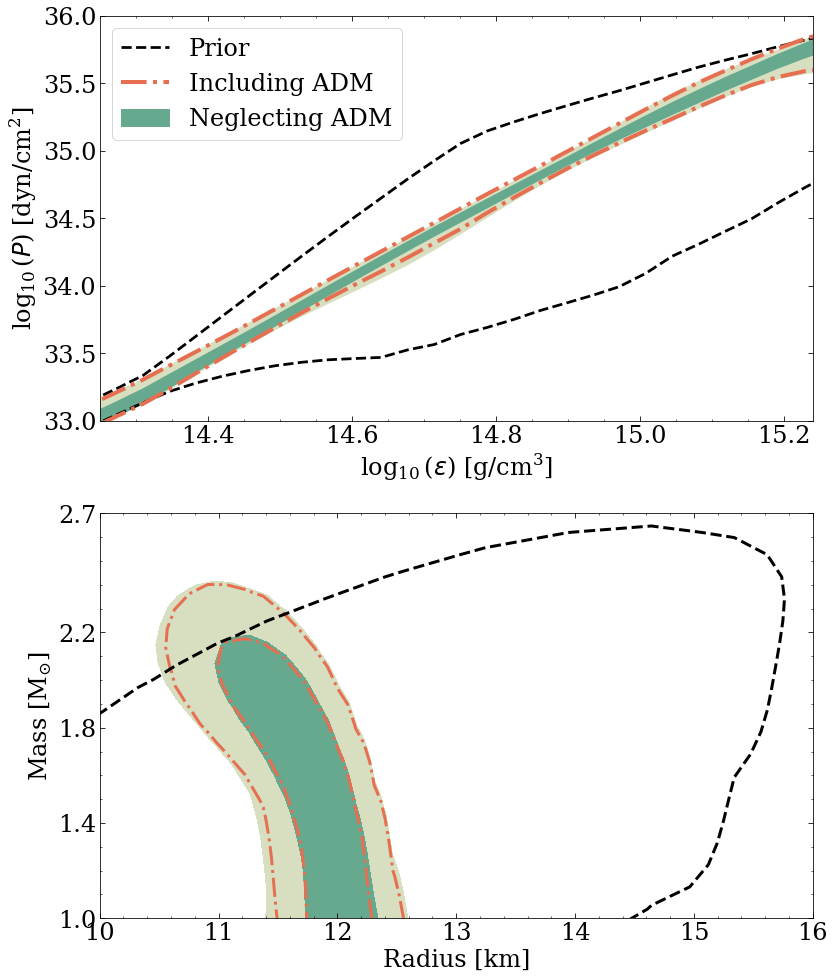

In [11]:
fig, ax = pyplot.subplots(nrows=2, ncols=1,figsize=(12,14))
my_fontsize=24
my_font = 'serif'
plt.rc('font',family = my_font)
plt.rcParams.update({'font.size': 20})

mass_radius_posterior_plot(root_name_ADM,root_name_B,root_prior,ax = ax[1])




adm_contours_min = adm_contours_NI[0]
adm_contours_max = adm_contours_NI[1]
minpres_adm = np.log10(adm_contours_min)
maxpres_adm = np.log10(adm_contours_max)


prior_contours_min = prior_contours[0]
prior_contours_max = prior_contours[1]
minpres_prior = np.log10(prior_contours_min)
maxpres_prior = np.log10(prior_contours_max)




ax[0].plot(maxpres_prior[:,0], minpres_prior[:,2], c='black', linestyle='--', lw=2.75)
ax[0].plot(maxpres_prior[:,0], maxpres_prior[:,2], c='black', linestyle='--', lw=2.75,label = 'Prior')

ax[0].plot(maxpres_adm[:,0], minpres_adm[:,2], c='#E76F51', linestyle='-.', lw=4)
ax[0].plot(maxpres_adm[:,0], maxpres_adm[:,2], c='#E76F51', linestyle='-.', lw=4,label = 'Including ADM')
ax[0].fill_between(minpres_ppNI[:,0], minpres_ppNI[:,2], maxpres_ppNI[:,2], 
                       color=sns.cubehelix_palette(8, start=.5, rot=-.75, dark=.2, light=.85)[0], alpha=1)
ax[0].fill_between(minpres_ppNI[:,0], minpres_ppNI[:,1], maxpres_ppNI[:,1], 
                       color=sns.cubehelix_palette(8, start=.5, rot=-.75, dark=.2, light=.85)[3], 
                      alpha=1,label = 'Neglecting ADM')
       

ax[0].set_ylabel(r'$\log_{10}(P)$ [dyn/cm$^2$]', size=my_fontsize,font = my_font)



ax[0].legend(loc = 'upper left',fontsize = 24)
ax[0].set_xlim(14.25, 15.24)
ax[0].set_xlabel(r'$\log_{10}(\varepsilon)$ [g/cm$^3$]', fontsize=my_fontsize,font = my_font)
ax[0].set_xticks(np.arange(14.25, 15.24,.05),minor =True)
ax[0].set_ylim(33,36)
ax[0].set_yticks([33,33.5,34,34.5,35,35.5,36],minor =True)
ax[0].tick_params(top=1,right=1, which='both', direction='in', labelsize=my_fontsize)

ax[1].set_xlim(10, 16)
ax[1].set_xticks([10,11,12,13,14,15,16])
ax[1].set_ylim(1., 2.7)
ax[1].set_yticks([1.,1.4,1.8,2.2,2.7])

ax[1].minorticks_on()
ax[1].tick_params(top=1,right=1, which='both', direction='in', labelsize=my_fontsize)
ax[1].set_xlabel(r'Radius [km]', fontsize=my_fontsize)
ax[1].set_ylabel(r'Mass [M$_{\odot}$]', fontsize=my_fontsize)
    
    

pyplot.tight_layout()
pyplot.show()
fig.savefig(plots_directory + 'FutureX_NO_ADM_core_posteriors.png',bbox_inches='tight')



In [12]:
prior_directory = '../results/prior/'

including_admcore_directory = '../results/posterior/Future-X/ADM_Model/FUTUREX_ADM_VARYING_BARYONIC/'

neglecting_admcore_directory = '../results/posterior/Future-X/ADM_Model/FUTUREX_ADM_BARYONIC_ONLY/'

In [13]:
energydensities = np.logspace(14.2, 16, 50)
pressures_prior = np.load(prior_directory + 'FERMIONIC_REAL_DATA_PRIOR_Pressure_array.npy')
prior_contours = calc_bands(energydensities, pressures_prior)


maxpres_adm_NI = np.load(including_admcore_directory + 'FUTUREX_ADM_VARYING_BARYONIC_maxpres.npy')
minpres_adm_NI = np.load(including_admcore_directory + 'FUTUREX_ADM_VARYING_BARYONIC_minpres.npy')
adm_contours_NI = minpres_adm_NI,maxpres_adm_NI

sample too small for 6551285568595496.00
sample too small for 7129535313794352.00
sample too small for 7758824319047053.00
sample too small for 8443657568728348.00
sample too small for 9188937680019554.00
sample too small for 10000000000000000.00


In [14]:
contours_min = np.load(neglecting_admcore_directory + 'FUTUREX_ADM_BARYONIC_ONLY_minpres.npy')
contours_max = np.load(neglecting_admcore_directory + 'FUTUREX_ADM_BARYONIC_ONLY_maxpres.npy')
minpres_ppNI = np.log10(contours_min)
maxpres_ppNI = np.log10(contours_max)

In [15]:
root_name_ADM = including_admcore_directory + 'FUTUREX_ADM_VARYING_BARYONIC_'
root_name_B = neglecting_admcore_directory + 'FUTUREX_ADM_BARYONIC_ONLY_'
root_prior = prior_directory + 'FERMIONIC_REAL_DATA_PRIOR_'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


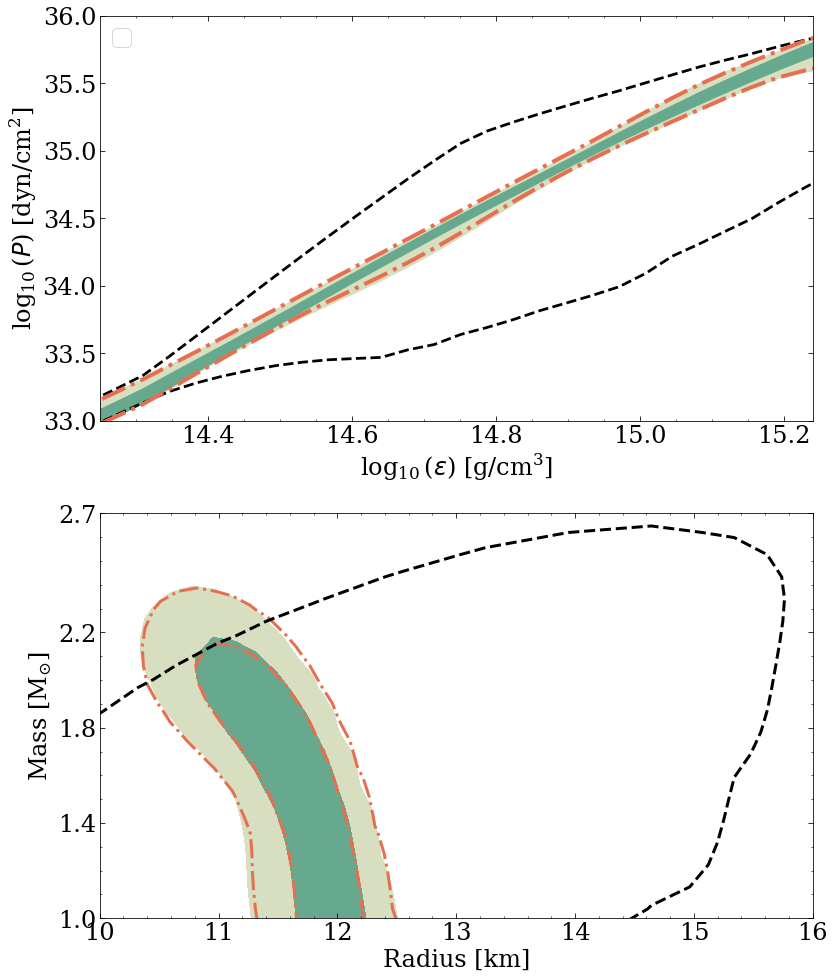

In [16]:
fig, ax = pyplot.subplots(nrows=2, ncols=1,figsize=(12,14))
my_fontsize=24
my_font = 'serif'
plt.rc('font',family = my_font)
plt.rcParams.update({'font.size': 20})

mass_radius_posterior_plot(root_name_ADM,root_name_B,root_prior,ax = ax[1])




adm_contours_min = adm_contours_NI[0]
adm_contours_max = adm_contours_NI[1]
minpres_adm = np.log10(adm_contours_min)
maxpres_adm = np.log10(adm_contours_max)


prior_contours_min = prior_contours[0]
prior_contours_max = prior_contours[1]
minpres_prior = np.log10(prior_contours_min)
maxpres_prior = np.log10(prior_contours_max)




ax[0].plot(maxpres_prior[:,0], minpres_prior[:,2], c='black', linestyle='--', lw=2.75)
ax[0].plot(maxpres_prior[:,0], maxpres_prior[:,2], c='black', linestyle='--', lw=2.75)

ax[0].plot(maxpres_adm[:,0], minpres_adm[:,2], c='#E76F51', linestyle='-.', lw=4)
ax[0].plot(maxpres_adm[:,0], maxpres_adm[:,2], c='#E76F51', linestyle='-.', lw=4)
ax[0].fill_between(minpres_ppNI[:,0], minpres_ppNI[:,2], maxpres_ppNI[:,2], 
                       color=sns.cubehelix_palette(8, start=.5, rot=-.75, dark=.2, light=.85)[0], alpha=1)
ax[0].fill_between(minpres_ppNI[:,0], minpres_ppNI[:,1], maxpres_ppNI[:,1], 
                       color=sns.cubehelix_palette(8, start=.5, rot=-.75, dark=.2, light=.85)[3], 
                      alpha=1)
       

ax[0].set_ylabel(r'$\log_{10}(P)$ [dyn/cm$^2$]', size=my_fontsize,font = my_font)



ax[0].legend(loc = 'upper left',fontsize = 24)
ax[0].set_xlim(14.25, 15.24)
ax[0].set_xlabel(r'$\log_{10}(\varepsilon)$ [g/cm$^3$]', fontsize=my_fontsize,font = my_font)
ax[0].set_xticks(np.arange(14.25, 15.24,.05),minor =True)
ax[0].set_ylim(33,36)
ax[0].set_yticks([33,33.5,34,34.5,35,35.5,36],minor =True)
ax[0].tick_params(top=1,right=1, which='both', direction='in', labelsize=my_fontsize)

ax[1].set_xlim(10, 16)
ax[1].set_xticks([10,11,12,13,14,15,16])
ax[1].set_ylim(1., 2.7)
ax[1].set_yticks([1.,1.4,1.8,2.2,2.7])

ax[1].minorticks_on()
ax[1].tick_params(top=1,right=1, which='both', direction='in', labelsize=my_fontsize)
ax[1].set_xlabel(r'Radius [km]', fontsize=my_fontsize)
ax[1].set_ylabel(r'Mass [M$_{\odot}$]', fontsize=my_fontsize)
    
    

pyplot.tight_layout()
pyplot.show()
fig.savefig(plots_directory + 'FutureX_ADM_core_posteriors.png',bbox_inches='tight')